In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
col_list = ['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'PM2.5 AQI Value']
df = pd.read_csv('data/airquality.csv', usecols=col_list)
df = df.rename({'PM2.5 AQI Value':'AQI'}, axis=1)

In [3]:
#Since climate information is not available for many of them, we have to remove those rows.
df = df.dropna()

In [4]:
df['H'].replace(to_replace='-', value='0', inplace=True)
df['PP'].replace(to_replace='-', value='0', inplace=True)
df['SLP'].replace(to_replace='-', value='0', inplace=True)

df['H'] = df['H'].astype(float)
df['PP'] = df['PP'].astype(float)
df['SLP'] = df['SLP'].astype(float)

## Train Test Split

In [5]:
X = df.loc[:,df.columns!= 'AQI']
y = df['AQI']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [19]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [20]:
%%time
rf=RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.1s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   2.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.0s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.4s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   2.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.6s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   2.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   2.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   2.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   2.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   2.2s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   3.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   3.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   3.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.8s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=900, min_samples_split=

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=100, min_samples

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.7s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=1200, min_sample

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   1.5s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   1.7s
[CV] n_estimators=500, min_samples_split=5, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=500, min_samples_split=5

[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   3.4s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   3.3s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   3.3s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   3.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=800, min_samples_spl

[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   2.5s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   3.0s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   2.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   2.6s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   2.9s
[CV] n_estimators=1100, min_samples_split=100, min_s

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 16.5min finished


Wall time: 16min 32s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [22]:
print(rf_random.best_params_)
print(rf_random.best_score_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
-159.73674767620798


In [26]:
y_pred = rf_random.predict(X_test)

<AxesSubplot:>

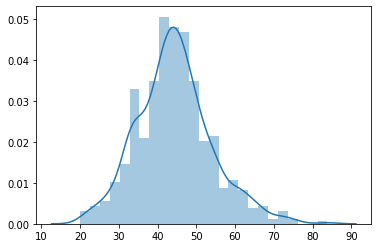

In [27]:
import seaborn as sns
sns.distplot(y_pred)

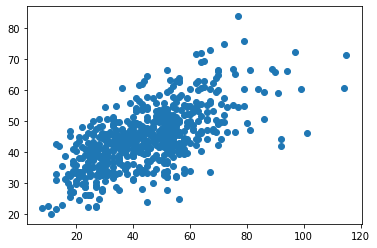

In [30]:
plt.scatter(y_test,y_pred)

In [31]:

from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


RMSE: 12.92656482228248
